In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('nigerian_music_data.csv')

In [3]:
df.head()

,name,album,popularity,artist,release_date,length,album_art,album_type,duration_ms,explicit,...,valence,Song URL,Own_Song?,Length_s,Right_Field_1,id,small_album_art,Right_ActualURL,Artist_Name,Collaborator
0,Around The World,20,17,Mafikizolo,11/24/2017,270440,https://i.scdn.co/image/68f3c417f0d81acc4c3136...,album,270440,False,...,0.794,https://open.spotify.com/track/1qMLaYRP5F8WdYb...,No,270.440,9,5VaJdyFRG30hBV44mHqMHx,https://i.scdn.co/image/b83163325a4c7677875631...,https://open.spotify.com/album/5VaJdyFRG30hBV4...,Wizkid,Mafikizolo
1,Many Men (feat. Wizkid),#Powerful,6,Illbliss,6/12/2015,217965,https://i.scdn.co/image/65e438cc725c2cc8ccd991...,album,217965,True,...,0.898,https://open.spotify.com/track/1uOxMoSHuISADS4...,No,217.965,3,5FbSez2H3iZYQ10GJWiXUC,https://i.scdn.co/image/292482235b953a10a48a9b...,https://open.spotify.com/album/5FbSez2H3iZYQ10...,Wizkid,Illbliss
2,Follow Me (feat. Wizkid),6ix O' clock,13,Yung6ix,2/6/2014,256120,https://i.scdn.co/image/1f9f03e99cf40241aed16e...,album,256120,False,...,0.495,https://open.spotify.com/track/16NmfILPLJiNAZi...,No,256.120,32,39M9lQYurOE3iLYo6l93wx,https://i.scdn.co/image/7197ad86b783ecd89c9e36...,https://open.spotify.com/album/39M9lQYurOE3iLY...,Wizkid,Yung6ix
3,Blown Away,About Time,14,Angel,1/1/2013,227004,https://i.scdn.co/image/140c6a70213e5d821c9262...,album,227004,False,...,0.449,https://open.spotify.com/track/1T8xTFsI0RCqJYM...,No,227.004,1,5JpzMxMNOFMgcI1KYTd9Dy,https://i.scdn.co/image/6a76e8d93e78fc9b7744e4...,https://open.spotify.com/album/5JpzMxMNOFMgcI1...,Wizkid,Angel
4,Jeje,According to X,33,DJ Xclusive,9/21/2015,236329,https://i.scdn.co/image/7ae49950005bab6fea0849...,album,236329,False,...,0.966,https://open.spotify.com/track/4M0aSJh5QW8IWNf...,No,236.329,45,2K68QnBW5jKb4BrYJAyI4t,https://i.scdn.co/image/d7c7b607a70ba093a57223...,https://open.spotify.com/album/2K68QnBW5jKb4Br...,Wizkid,DJ Xclusive


In [4]:
df.shape

(1606, 31)

In [96]:
df.describe()

,popularity,track_no,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,Length_s
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,19.869048,6.254630,0.706411,0.274114,0.729434,0.011222,0.195714,-6.098698,0.205035,114.754749,3.927249,0.698024,212.497468
std,15.317856,7.087566,0.142004,0.234059,0.183630,0.080925,0.164726,3.966100,0.182211,27.121255,0.567133,0.208794,58.746593
min,0.000000,1.000000,0.000000,0.000158,0.034400,0.000000,0.013200,-33.686000,0.000000,0.000000,0.000000,0.000000,9.508000
25%,8.000000,1.000000,0.628000,0.077925,0.653000,0.000000,0.089700,-7.019000,0.075850,101.057000,4.000000,0.570000,194.441250
50%,18.000000,3.000000,0.734000,0.213000,0.764500,0.000000,0.130000,-5.183000,0.155500,111.007500,4.000000,0.744500,217.313000
75%,29.000000,10.000000,0.804000,0.424000,0.861000,0.000016,0.254750,-3.831500,0.278000,125.001250,4.000000,0.864000,240.000000
max,82.000000,50.000000,0.976000,0.990000,0.996000,0.930000,0.961000,0.851000,0.967000,231.988000,5.000000,0.977000,794.801000


In [5]:
df.columns

Index(['name', 'album', 'popularity', 'artist', 'release_date', 'length',
       'album_art', 'album_type', 'duration_ms', 'explicit', 'preview_url',
       'track_no', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature', 'valence', 'Song URL', 'Own_Song?', 'Length_s',
       'Right_Field_1', 'id', 'small_album_art', 'Right_ActualURL',
       'Artist_Name', 'Collaborator'],
      dtype='object')

In [6]:
df.rename(columns={"Own_Song?":"own_song"},inplace=True)

In [7]:
df.drop(columns=['length','preview_url','album_art','Song URL','duration_ms','Right_Field_1','small_album_art','Right_ActualURL'],inplace=True)

In [8]:
df

,name,album,popularity,artist,release_date,album_type,explicit,track_no,danceability,acousticness,...,loudness,speechiness,tempo,time_signature,valence,own_song,Length_s,id,Artist_Name,Collaborator
0,Around The World,20,17,Mafikizolo,11/24/2017,album,False,12,0.782,0.031800,...,-4.139,0.0421,104.008,4.0,0.794,No,270.440,5VaJdyFRG30hBV44mHqMHx,Wizkid,Mafikizolo
1,Many Men (feat. Wizkid),#Powerful,6,Illbliss,6/12/2015,album,True,6,0.760,0.224000,...,-0.784,0.0554,99.986,4.0,0.898,No,217.965,5FbSez2H3iZYQ10GJWiXUC,Wizkid,Illbliss
2,Follow Me (feat. Wizkid),6ix O' clock,13,Yung6ix,2/6/2014,album,False,16,0.477,0.058000,...,-6.400,0.2230,83.316,3.0,0.495,No,256.120,39M9lQYurOE3iLYo6l93wx,Wizkid,Yung6ix
3,Blown Away,About Time,14,Angel,1/1/2013,album,False,3,0.535,0.024800,...,-6.079,0.0556,92.984,4.0,0.449,No,227.004,5JpzMxMNOFMgcI1KYTd9Dy,Wizkid,Angel
4,Jeje,According to X,33,DJ Xclusive,9/21/2015,album,False,15,0.838,0.381000,...,-3.015,0.1530,128.007,4.0,0.966,No,236.329,2K68QnBW5jKb4BrYJAyI4t,Wizkid,DJ Xclusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,9ice vs Tiwa Savage,Versus (The Battle Line is Drawn),7,9ice,12/12/2011,album,False,7,0.639,0.475000,...,-7.280,0.0349,125.027,4.0,0.674,No,284.360,0LkRFtGH6JitTc7eQgy2Uf,Tiwa Savage,9ice
1602,Wait - Refix,Wait (Refix),22,Solidstar,5/27/2016,single,False,1,0.719,0.029500,...,-1.070,0.1620,101.854,4.0,0.854,No,279.906,0wNVv3S7tq4ExGwEZOKAqr,Tiwa Savage,Solidstar
1603,Woju (Remix) [feat. Davido & Tiwa Savage],Woju (Remix) [feat. Davido & Tiwa Savage],43,Kiss Daniel,2/28/2015,single,False,1,0.789,0.297000,...,-2.735,0.0460,113.950,4.0,0.972,No,204.277,2uqJUP4F59bkjjQpiWNL8M,Tiwa Savage,Kiss Daniel
1604,Industreet (Cypher) (feat. Reminisce & Base1),YBNL,6,Olamide,12/1/2016,album,True,20,0.572,0.307000,...,-4.882,0.3510,152.852,4.0,0.630,No,374.053,0mBEVecZUhNn4sD2nHvJTX,Tiwa Savage,Olamide


In [9]:
df.shape

(1606, 23)

In [10]:
df.isna().sum()/df.shape[0]

name                0.000000
album               0.000000
popularity          0.000000
artist              0.000000
release_date        0.000000
album_type          0.000000
explicit            0.000000
track_no            0.000000
danceability        0.058531
acousticness        0.058531
energy              0.058531
instrumentalness    0.058531
liveness            0.058531
loudness            0.058531
speechiness         0.058531
tempo               0.058531
time_signature      0.058531
valence             0.058531
own_song            0.000000
Length_s            0.000000
id                  0.000000
Artist_Name         0.000000
Collaborator        0.000000
dtype: float64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(1512, 23)

In [13]:
df.isna().sum()/df.shape[0]

name                0.0
album               0.0
popularity          0.0
artist              0.0
release_date        0.0
album_type          0.0
explicit            0.0
track_no            0.0
danceability        0.0
acousticness        0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
time_signature      0.0
valence             0.0
own_song            0.0
Length_s            0.0
id                  0.0
Artist_Name         0.0
Collaborator        0.0
dtype: float64

In [126]:
b=df.groupby(['Artist_Name','own_song']).Artist_Name.count()

In [122]:
a=df.Artist_Name.value_counts()

### Comparing their own songs to songs they were featured on

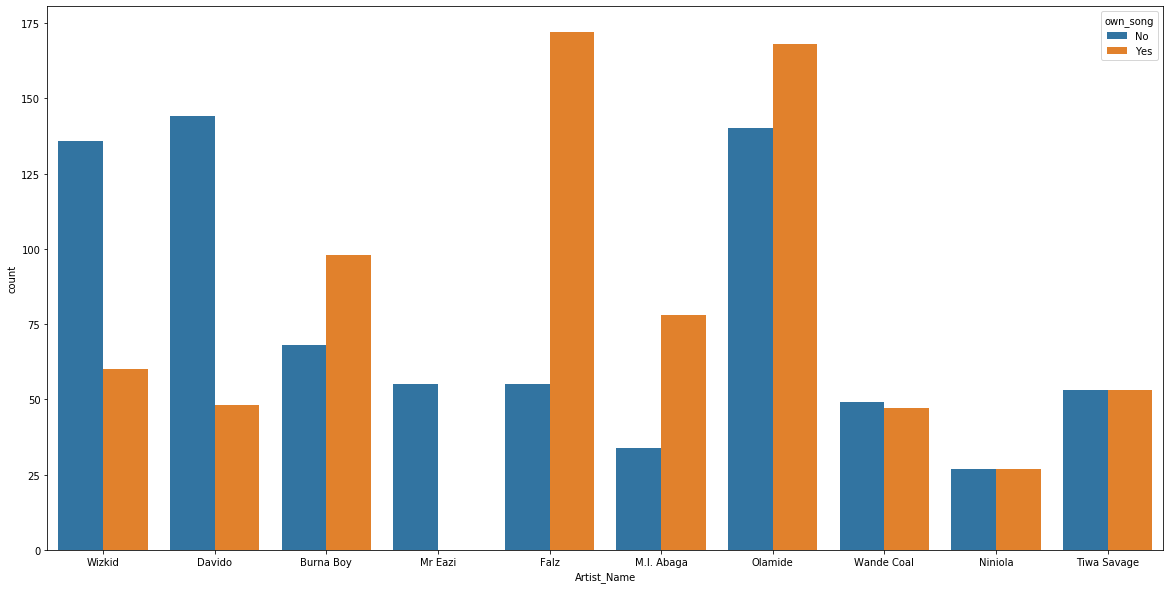

In [138]:
plt.figure(figsize=[20,10])
sns.countplot(data=df,x='Artist_Name',hue='own_song')

In [90]:
art_pop=df.groupby(['Artist_Name','own_song']).popularity.mean()

In [91]:
art_pop

Artist_Name  own_song
Burna Boy    No          22.176471
             Yes         30.969388
Davido       No          20.416667
             Yes         34.375000
Falz         No          12.290909
             Yes          9.186047
M.I. Abaga   No           5.088235
             Yes         17.474359
Mr Eazi      No          23.127273
Niniola      No          15.000000
             Yes         24.444444
Olamide      No          11.471429
             Yes         16.369048
Tiwa Savage  No          18.037736
             Yes         25.377358
Wande Coal   No          21.020408
             Yes         22.638298
Wizkid       No          29.125000
             Yes         34.466667
Name: popularity, dtype: float64

In [92]:
art=art_pop.to_frame(name='Popularity').reset_index()

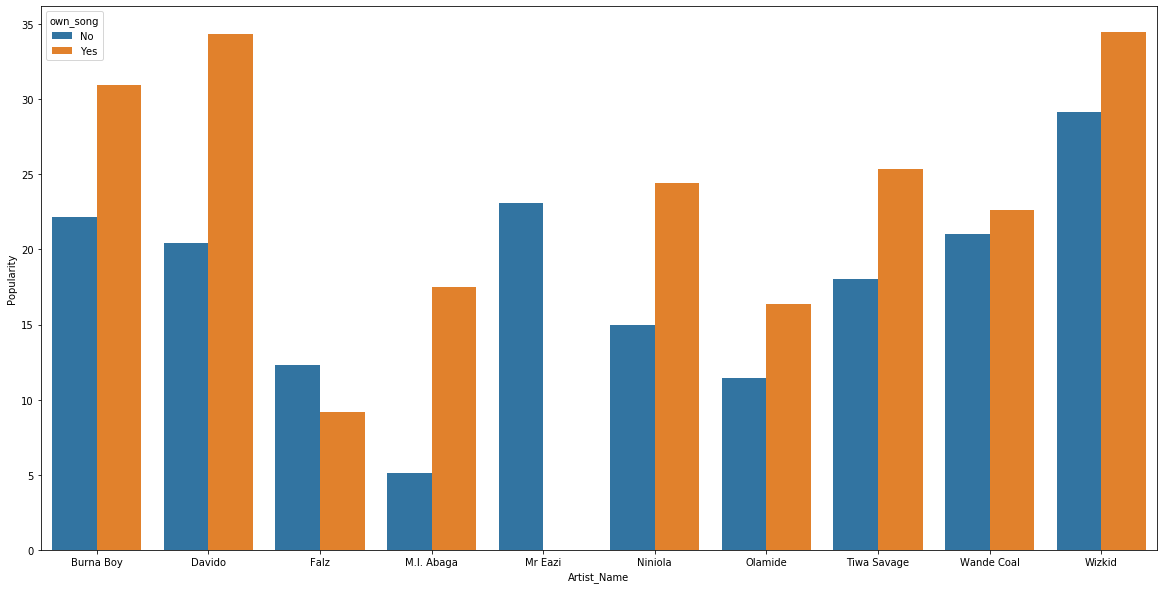

In [94]:
plt.figure(figsize=[20,10])
sns.barplot(data=art,x='Artist_Name',y='Popularity',hue='own_song')

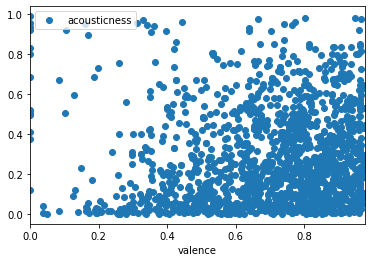

In [101]:
df.plot(x='valence',y='acousticness',style='o')